In [1]:
import numpy as np
import pandas as pd

서울 = pd.read_csv("./서울_청약_매물_시세차익_데이터.csv", encoding='cp949')
서울.head()[['주택명','주택형','경쟁률']]

,주택명,주택형,경쟁률
0,래미안 원페를라,059.9800A,305.14
1,래미안 원페를라,059.9800A,0.00
2,래미안 원페를라,059.9800A,0.00
3,래미안 원페를라,059.9800A,0.00
4,래미안 원페를라,059.9500B,307.43


# 수치형 변수 간 상관관계
- 최저당첨가점 & 시세차익 약한 상관관계 (0.36)
- 최저당첨가점 & 공급금액 약한 상관관계 (0.37)
- 전용면적 & 시세차익 약한 상관관계 (0.4)
- 전용면적 & 공급금액 약한 상관관계 (0.4)

In [5]:

import pandas as pd

뉴서울 = pd.read_csv("../../storage/train_data/train-2트_시세차익o.csv", encoding='cp949')



In [7]:
# # '최고당첨가점' 컬럼에 NaN 값과 '-'를 0으로 변경
# 뉴서울['최고당첨가점'] = 뉴서울['최고당첨가점'].replace({np.nan: 0, '-': 0})

# # '최고당첨가점' 컬럼을 수치형으로 변경
# 뉴서울['최고당첨가점'] = pd.to_numeric(뉴서울['최고당첨가점'])

뉴서울['최저당첨가점']

0       34.0
1       24.0
2       69.0
3       69.0
4       69.0
        ... 
2976    62.0
2977    58.0
2978    61.0
2979    63.0
2980    66.0
Name: 최저당첨가점, Length: 2981, dtype: float64

In [12]:
뉴서울.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공급지역코드        2981 non-null   int64  
 1   공급규모          2981 non-null   int64  
 2   투기과열지구        2981 non-null   object 
 3   조정대상지역        2981 non-null   object 
 4   분양가상한제        2981 non-null   object 
 5   정비사업          2981 non-null   object 
 6   공공주택지구        2981 non-null   object 
 7   대규모택지개발지구     2981 non-null   object 
 8   수도권내민영공공주택지구  2981 non-null   object 
 9   공급세대수         2981 non-null   int64  
 10  순위            2981 non-null   object 
 11  거주지역          2981 non-null   object 
 12  접수건수          2981 non-null   int64  
 13  경쟁률           2981 non-null   float64
 14  최저당첨가점        2981 non-null   float64
 15  토픽 1          2981 non-null   float64
 16  토픽 2          2981 non-null   float64
 17  토픽 3          2981 non-null   float64
 18  토픽 4          2981 non-null 

In [ ]:
# 수치형변수 간 상관관계 분석
num_cols = 뉴서울.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = 뉴서울[num_cols].corr(method='spearman')
print(corr_matrix)

          공급지역코드      공급규모     공급세대수      접수건수       경쟁률    최저당첨가점      토픽 1  \
공급지역코드  1.000000  0.175951  0.233708  0.011304 -0.081072 -0.357146 -0.163382   
공급규모    0.175951  1.000000  0.461776  0.107713 -0.055147 -0.101851 -0.073841   
공급세대수   0.233708  0.461776  1.000000  0.077962 -0.041111 -0.172855 -0.057923   
접수건수    0.011304  0.107713  0.077962  1.000000 -0.041031  0.082695 -0.011615   
경쟁률    -0.081072 -0.055147 -0.041111 -0.041031  1.000000  0.172835  0.043182   
최저당첨가점 -0.357146 -0.101851 -0.172855  0.082695  0.172835  1.000000  0.137273   
토픽 1   -0.163382 -0.073841 -0.057923 -0.011615  0.043182  0.137273  1.000000   
토픽 2   -0.257066  0.076041 -0.018382  0.075496  0.018788  0.229448 -0.004301   
토픽 3    0.227054  0.041750  0.096797  0.021461 -0.045388 -0.143454 -0.169536   
토픽 4   -0.243225  0.051444  0.031539  0.037935  0.131857  0.380044 -0.070363   
토픽 5   -0.149312 -0.102402 -0.102182 -0.069437 -0.024071 -0.059241  0.076151   
토픽 6    0.359589  0.076268  0.099092  0.

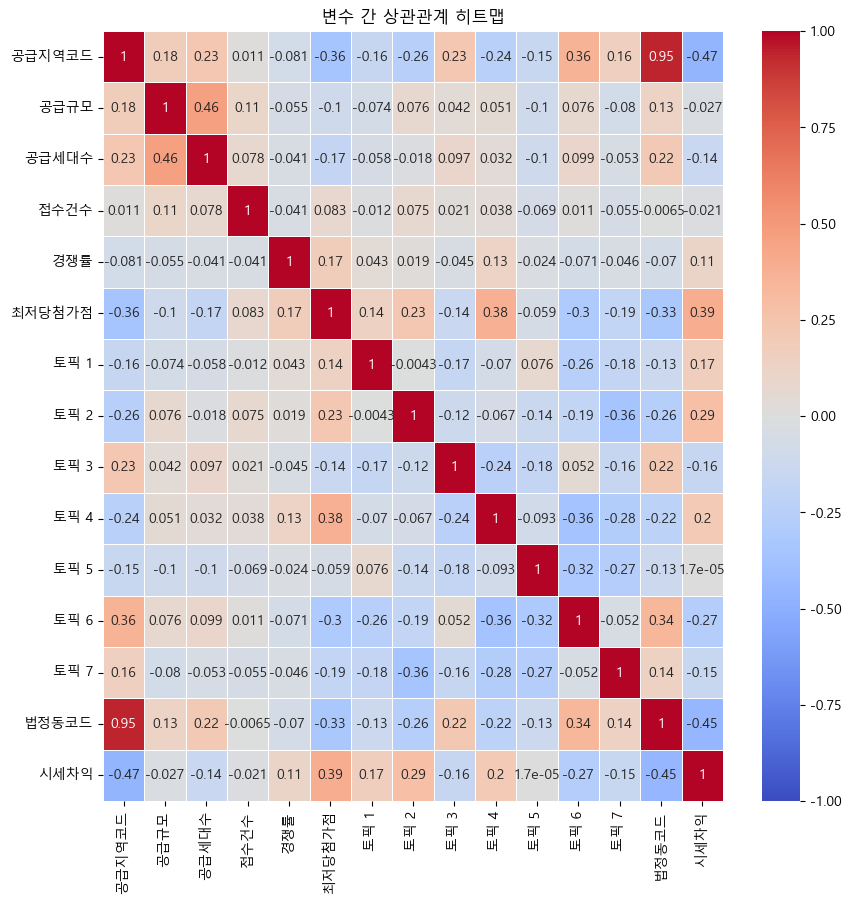

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, vmin=-1, vmax=1)

plt.title("변수 간 상관관계 히트맵")
plt.show()

# 시세차익과 최저/최고당첨가점(target)의 관계


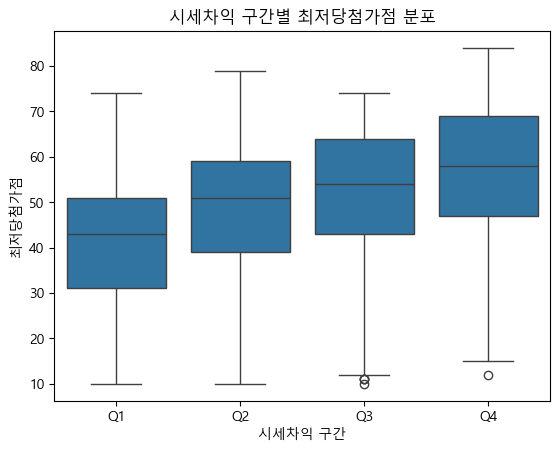

In [7]:
뉴서울['시세차익_구간'] = pd.qcut(뉴서울['시세차익'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

sns.boxplot(data=뉴서울, x='시세차익_구간', y='최저당첨가점')
plt.title('시세차익 구간별 최저당첨가점 분포')
plt.xlabel('시세차익 구간')
plt.ylabel('최저당첨가점')
plt.show()   

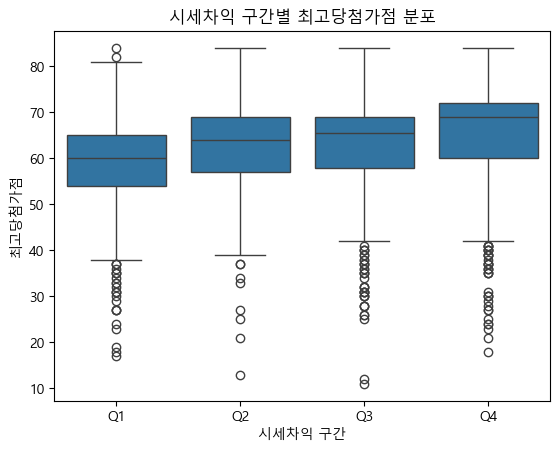

In [8]:
뉴서울['시세차익_구간'] = pd.qcut(뉴서울['시세차익'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

sns.boxplot(data=뉴서울, x='시세차익_구간', y='최고당첨가점')
plt.title('시세차익 구간별 최고당첨가점 분포')
plt.xlabel('시세차익 구간')
plt.ylabel('최고당첨가점')
plt.show()  

# 규제지역과 최저당첨가점과의 관계 (브라우저 연결)
- 규제지역(분양가상한제/조정대상지역/투기과열지구) 모두 p-value값 0.05이하로 최저당첨가점과 유의미한 관계
- (시각화) 규제지역일 수록 최저당첨가점 증가

In [9]:
import pandas as pd
encoded_서울 = 뉴서울.copy()

# encoded_서울 데이터프레임이 이미 존재한다고 가정

# 원핫인코딩 수행
encoded_서울 = pd.get_dummies(뉴서울, columns=['투기과열지구', '조정대상지역', '분양가상한제'], drop_first=False)

# 결과 확인
encoded_서울.columns

Index(['공고번호', '주택명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모', '모집공고일',
       '청약접수시작일', '청약접수종료일', '당첨자발표일', '정비사업', '공공주택지구', '대규모택지개발지구',
       '수도권내민영공공주택지구', '주택형', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률', '최저당첨가점',
       '최고당첨가점', '평균당첨가점', '전용면적', '미달여부', '공급금액(최고가 기준)', '위도', '경도', '행정동코드',
       '법정동코드', '시도', '시군구', '읍면동1', '읍면동2', '전용면적당 공급금액(최고가기준)', '전용면적당 시세차익',
       '기사 번호', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7',
       '주요 토픽', '시세차익', '최저당첨가점_정규화', '최고당첨가점_정규화', '시세차익_구간', '투기과열지구_N',
       '투기과열지구_Y', '조정대상지역_N', '조정대상지역_Y', '분양가상한제_N', '분양가상한제_Y'],
      dtype='object')

In [10]:
from scipy.stats import f_oneway
import pandas as pd

# 원핫인코딩된 데이터프레임 가정
# encoded_서울 데이터프레임이 이미 존재한다고 가정

# ANOVA 검정 함수 (각 규제별로 검정)
def perform_anova(df, regulation):
    # 해당 규제가 적용된 경우 (df[regulation + '_Y'] == True)
    group_yes = df[df[regulation + '_Y'] == True]['시세차익']
    # 해당 규제가 적용되지 않은 경우 (df[regulation + '_N'] == True)
    group_no = df[df[regulation + '_N'] == True]['시세차익']

    # 두 그룹 모두 데이터가 있는지 확인
    if not group_yes.empty and not group_no.empty:
        # 등분산성 검정 (Levene test)
        from scipy.stats import levene
        levene_stat, levene_p = levene(group_yes, group_no)
        print(f"{regulation} - Levene's test: p={levene_p:.3f}")

        # Levene test 결과에 따라 ANOVA 또는 Welch's ANOVA 수행
        if levene_p > 0.05:  # 등분산성 만족
            f_stat, p_value = f_oneway(group_yes, group_no)
            print(f"{regulation} - ANOVA 결과: F={f_stat:.4f}, p={p_value:.4f}")
        else:  # 등분산성 불만족
            # Welch's ANOVA 수행 (pingouin 라이브러리 필요)
            try:
                import pingouin as pg
                result = pg.welch_anova(data=df, dv='시세차익', between=regulation + '_Y')
                print(f"{regulation} - Welch's ANOVA 결과:\n{result}")
            except ImportError:
                print("pingouin 라이브러리가 설치되지 않았습니다. Welch's ANOVA를 수행할 수 없습니다.")
            except Exception as e:
                print(f"{regulation} - Welch's ANOVA 수행 중 오류 발생: {e}")

    else:
        print(f"{regulation} - 그룹 데이터 부족")


# 각 규제에 대해 ANOVA 검정 수행
perform_anova(encoded_서울, '투기과열지구')
perform_anova(encoded_서울, '조정대상지역')
perform_anova(encoded_서울, '분양가상한제')

투기과열지구 - Levene's test: p=nan
투기과열지구 - Welch's ANOVA 결과:
     Source  ddof1       ddof2           F         p-unc      np2
0  투기과열지구_Y      1  1655.78354  260.660217  1.442123e-54  0.09388
조정대상지역 - Levene's test: p=nan
조정대상지역 - Welch's ANOVA 결과:
     Source  ddof1        ddof2         F     p-unc       np2
0  조정대상지역_Y      1  3227.892433  10.42536  0.001255  0.002836
분양가상한제 - Levene's test: p=nan
분양가상한제 - Welch's ANOVA 결과:
     Source  ddof1        ddof2         F     p-unc      np2
0  분양가상한제_Y      1  2145.379842  6.582456  0.010366  0.00222


In [11]:
import plotly.subplots as sp
import plotly.express as px

# 포제스한강 빼고 보기
policy_seoul = encoded_서울[encoded_서울['공고번호'] != 2023000682]
policy_seoul.head()

# 서브플롯 생성
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('투기과열지구와 최저당첨가점', '분양가상한제와 최저당첨가점', '조정대상지역과 최저당첨가점'))

# 첫 번째 박스 플롯
fig1 = px.box(
    data_frame=policy_seoul,
    x='투기과열지구_Y',
    y='최저당첨가점',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    title = '투기과열지구와 최저당첨가점'
)

# 두 번째 박스 플롯
fig2 = px.box(
    data_frame=policy_seoul,
    x='분양가상한제_Y',
    y='최저당첨가점',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    title = '분양가상한제와 최저당첨가점'
)

# 세 번째 박스 플롯
fig3 = px.box(
    data_frame=policy_seoul,
    x='조정대상지역_Y',
    y='최저당첨가점',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    title = '조정대상지역과 최저당첨가점'
)

# 각 그래프를 서브플롯에 추가
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)

# 레이아웃 업데이트
fig.update_layout(height=600, width=1200, title_text="규제지역과 최저당첨가점 비교")

# 서브플롯 제목 설정 (개별 그래프의 제목 제거)
for i in range(1, 4):
    fig.update_xaxes(title_text="", row=1, col=i)
    fig.update_yaxes(title_text="최저당첨가점", row=1, col=i)

fig.show()


In [12]:
# 서브플롯 생성
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('투기과열지구와 최고당첨가점', '분양가상한제와 최고당첨가점', '조정대상지역과 최고당첨가점'))

# 첫 번째 박스 플롯
fig1 = px.box(
    data_frame=policy_seoul,
    x='투기과열지구_Y',
    y='최고당첨가점',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    title = '투기과열지구와 최고당첨가점'
)

# 두 번째 박스 플롯
fig2 = px.box(
    data_frame=policy_seoul,
    x='분양가상한제_Y',
    y='최고당첨가점',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    title = '분양가상한제와 최고당첨가점'
)

# 세 번째 박스 플롯
fig3 = px.box(
    data_frame=policy_seoul,
    x='조정대상지역_Y',
    y='최고당첨가점',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_white',
    title = '조정대상지역과 최고당첨가점'
)

# 각 그래프를 서브플롯에 추가
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)

# 레이아웃 업데이트
fig.update_layout(height=600, width=1200, title_text="규제지역과 최고당첨가점 비교")

# 서브플롯 제목 설정 (개별 그래프의 제목 제거)
for i in range(1, 4):
    fig.update_xaxes(title_text="", row=1, col=i)
    fig.update_yaxes(title_text="최고당첨가점", row=1, col=i)

fig.show()


# 규제지역과 시세차익
- 조정대상지역과 투기과열지구 동일함
- 규제지역일 수록 시세차익 높음

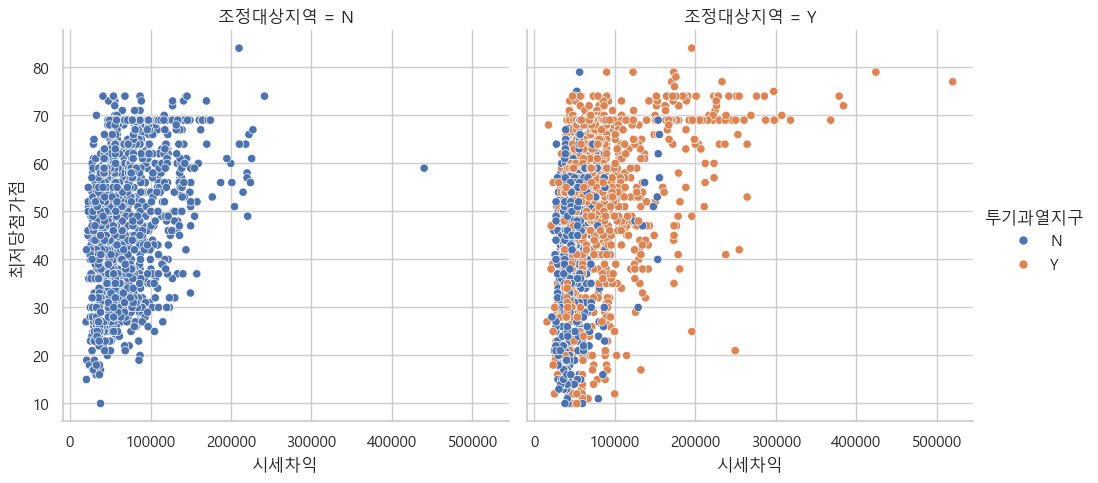

In [30]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

sns.relplot(data=뉴서울, x='시세차익', y='최저당첨가점', hue='투기과열지구', col='조정대상지역', kind="scatter")
plt.show()

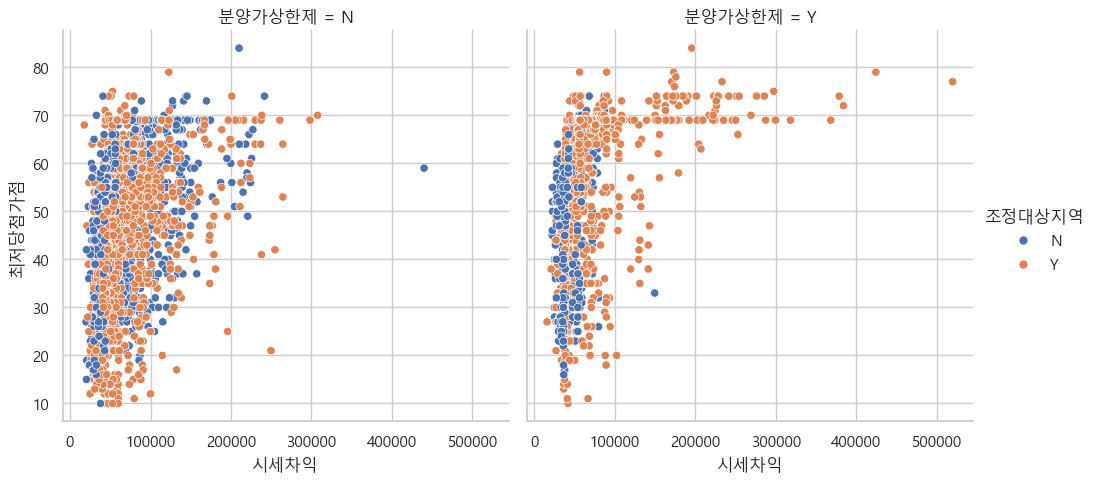

In [31]:
sns.relplot(data=뉴서울, x='시세차익', y='최저당첨가점', hue='조정대상지역', col='분양가상한제', kind="scatter")
plt.show()

# 지역별 시세차익

In [32]:
서울 = pd.read_csv("./서울_청약_매물_시세차익_데이터.csv", encoding='cp949')
# 시세차익 칼럼 생성
서울['시세차익'] = round(서울['전용면적'] * 서울['전용면적당 시세차익'] /10000, 2)
서울['시세차익']

0       172456.32
1       172456.32
2       172456.32
3       172456.32
4       176046.32
          ...    
4007    167182.69
4008    196679.39
4009    196679.39
4010    196679.39
4011    196679.39
Name: 시세차익, Length: 4012, dtype: float64

In [33]:
# 지도에 시세차익 분포 확인
import folium
import branca
import os


# 지도 중심 위치 설정 (서울 중심 좌표 예시)
map_center = [37.541, 126.986]
m = folium.Map(location=map_center, zoom_start=14, width = "100%", height="100%")

# 마커 추가 
for idx, row in 서울.dropna().iterrows():
    if row["시세차익"] > 100000:  # 10억 이상일 때
        radius = 150  # 큰 원
        color = "red"
    else:  # 1억 이하일 때
        radius = 70  # 작은 원
        color = "blue"

     # 경쟁률이 0이 아닌 경우에만 마커 추가
    if row['경쟁률'] != 0:
        folium.CircleMarker(
            location=[row["위도"], row["경도"]],
            radius = row["시세차익"] / 10000,  # 경쟁률에 따른 크기 조절 (곱하기 값 조절 가능)
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.01,
            opacity=0.7,
            annot=True,
            popup=f"시세차익: {row['시세차익']}<br>지역: {row['읍면동2']}<br>경쟁률: {row['경쟁률']}"
        ).add_to(m)

m